In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [4]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean

In [5]:
data = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [6]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
depth = data.variables['deptht'][:]
alk = data.variables['ALK'][:]

In [7]:
sliced_data = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

In [30]:
sliced_data

<xarray.Dataset>
Dimensions:            (time_counter: 1020, deptht: 1, y: 114, x: 71, bnds: 2)
Coordinates:
  * deptht             (deptht) float32 3.047
    nav_lat            (y, x) float32 35.13 35.13 35.13 ... 67.27 67.13 66.99
    nav_lon            (y, x) float32 -25.24 -24.74 -24.24 ... 22.95 23.49 24.03
  * time_counter       (time_counter) datetime64[ns] 2015-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    ALK                (time_counter, deptht, y, x) float64 nan ... nan
    deptht_bnds        (deptht, bnds, y, x) float32 nan 0.0 0.0 ... nan nan nan
    time_counter_bnds  (time_counter, bnds, y, x) datetime64[ns] NaT ... NaT
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    history:      Tue Jun 21 10:52:16 2022: ncks -O -L 1 ALK_CDR_EU_coast_ssp...
    name:         FOCI2.0-TK201_FMESM_SSP126_alkEU_2014CC105_1m_20150101_2015...
    description:  transient tracers
    title:        transient tracers
    production:   An IPSL model
    timeStamp:    2022-Jun-10 10:48:16 CEST
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

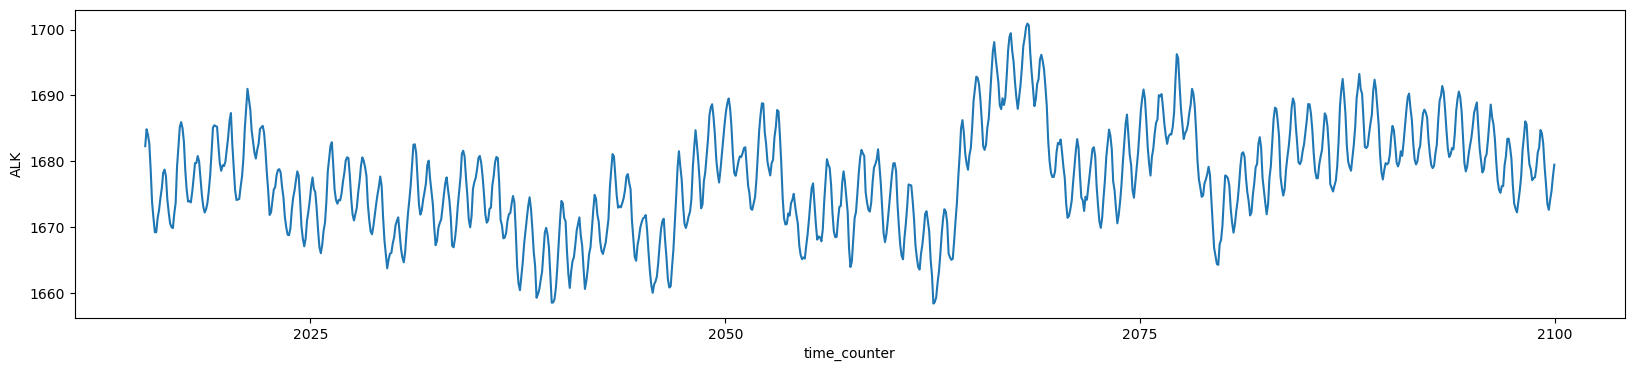

In [37]:
sliced_data.ALK.mean(dim=('y', 'x', 'deptht')).plot(figsize= (20, 4)) # global mean

In [8]:
sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

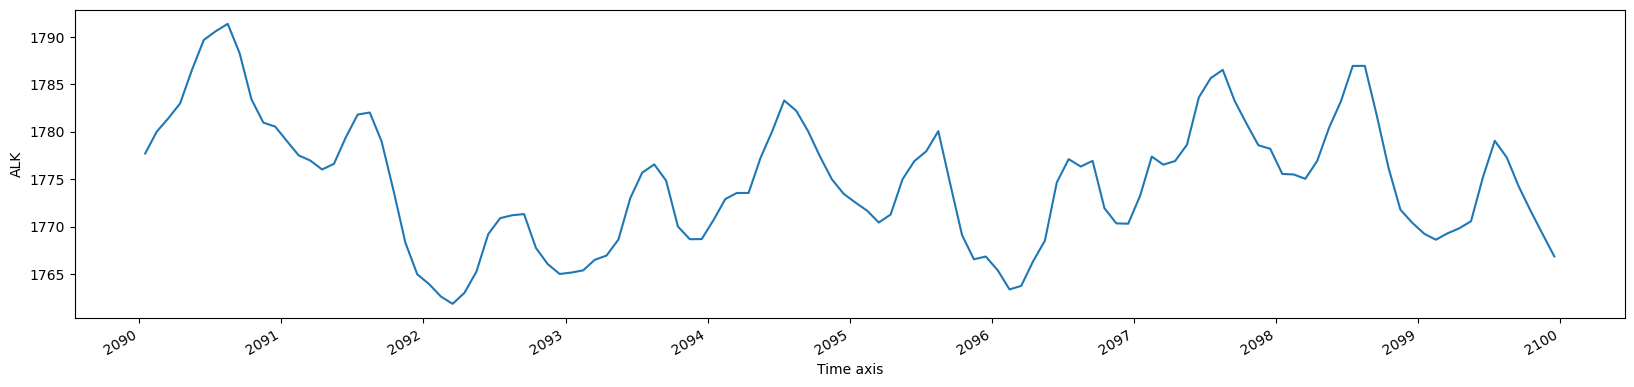

In [9]:
sliced_frame.ALK.mean(dim=('y', 'x', 'deptht')).plot(figsize= (20, 4)) # global mean

In [10]:
# slice timeframe

start_date = "2090-01-01"
end_date = "2100-01-01"

alk_flux = sliced_data["ALK"].sel(time_counter=slice(start_date, end_date))

In [11]:
month_length = alk_flux.time_counter.dt.days_in_month
alk_weighted_mean = ((alk_flux * month_length).resample(time_counter='QS-DEC').sum() / month_length.resample(time_counter='QS-DEC').sum())
alk_weighted_mean = alk_weighted_mean.where(alk_weighted_mean)
alk_weighted_season = alk_weighted_mean.groupby('time_counter').mean(["y", "x", "deptht"])

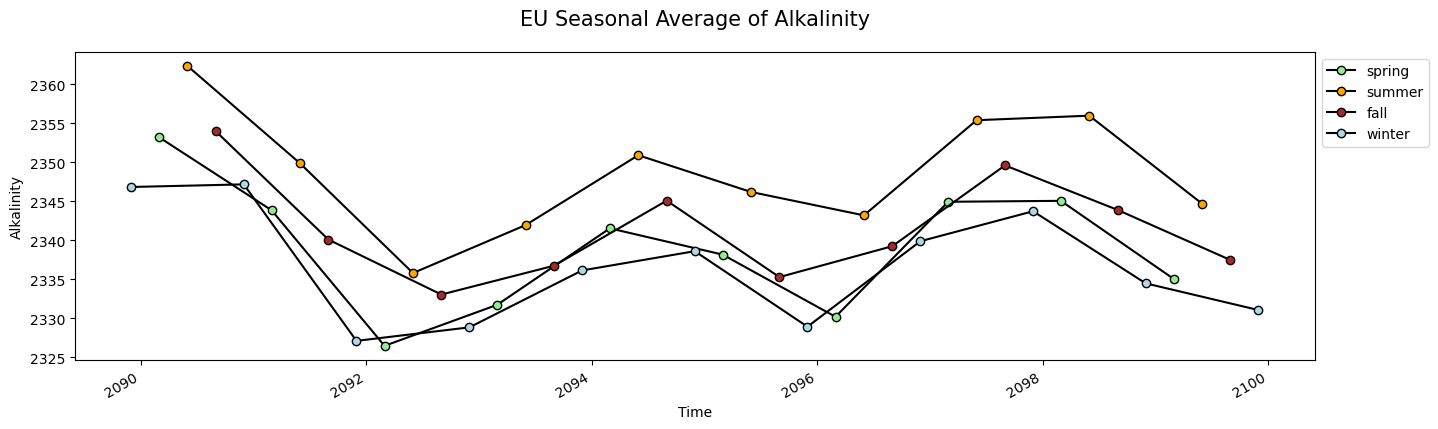

In [12]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in alk_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)
plt.xlabel("Time")
plt.ylabel("Alkalinity")
plt.show()

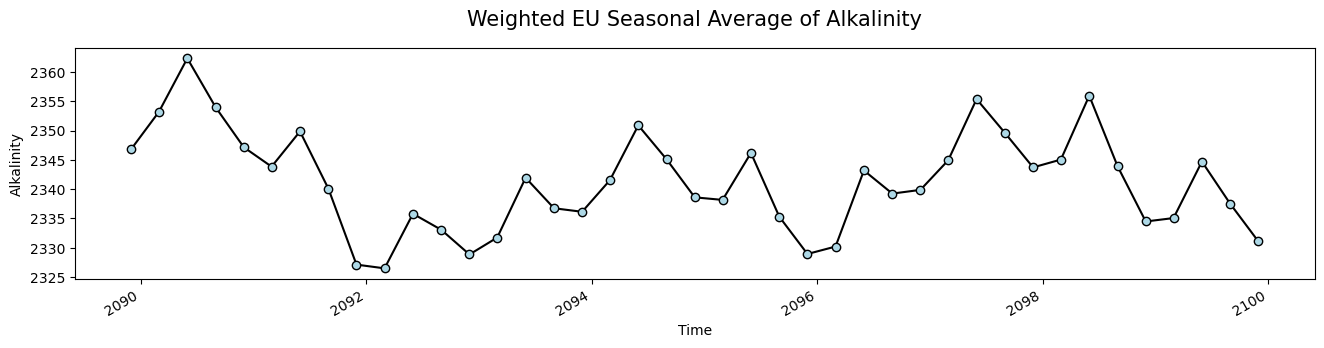

In [13]:
f, ax = plt.subplots(figsize=(16, 3))
alk_weighted_season.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)
plt.xlabel("Time")
plt.ylabel("Alkalinity")
plt.show()

In [14]:
alk_season_summary = alk_flux.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years = alk_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()
alk_seasonal_mean = alk_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


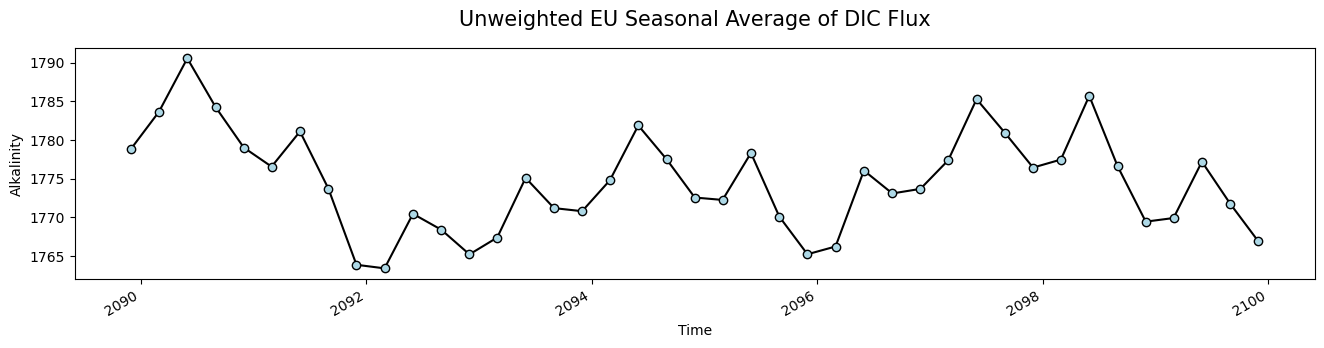

In [15]:
f, ax = plt.subplots(figsize=(16, 3))
alk_seasonal_mean.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set_title("Unweighted EU Seasonal Average of DIC Flux", fontsize=15, y=1.06)
plt.xlabel("Time")
plt.ylabel("Alkalinity")
plt.show()

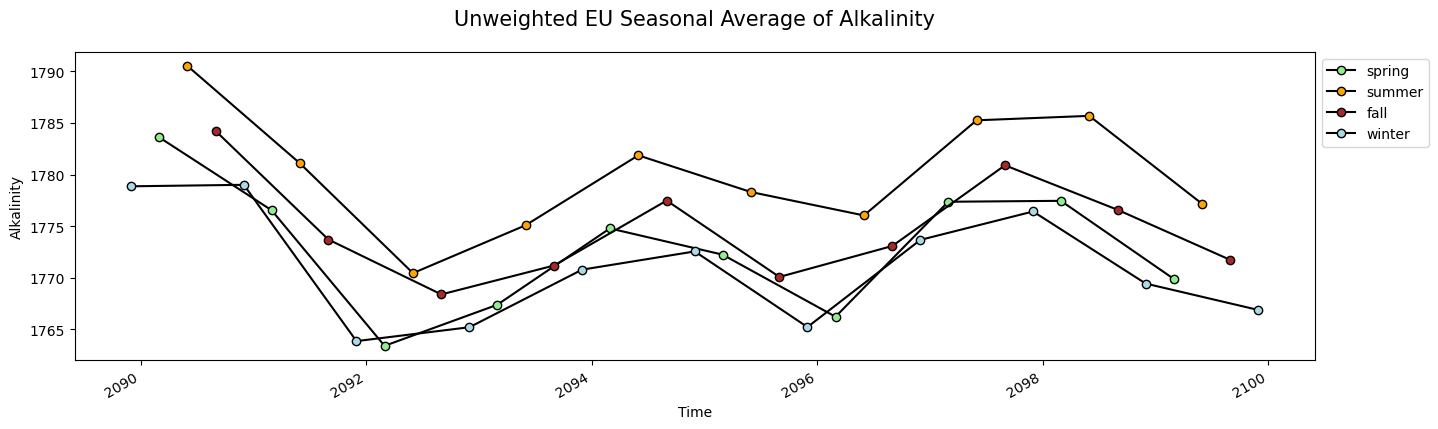

In [16]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in alk_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)
plt.xlabel("Time")
plt.ylabel("Alkalinity")
plt.show()

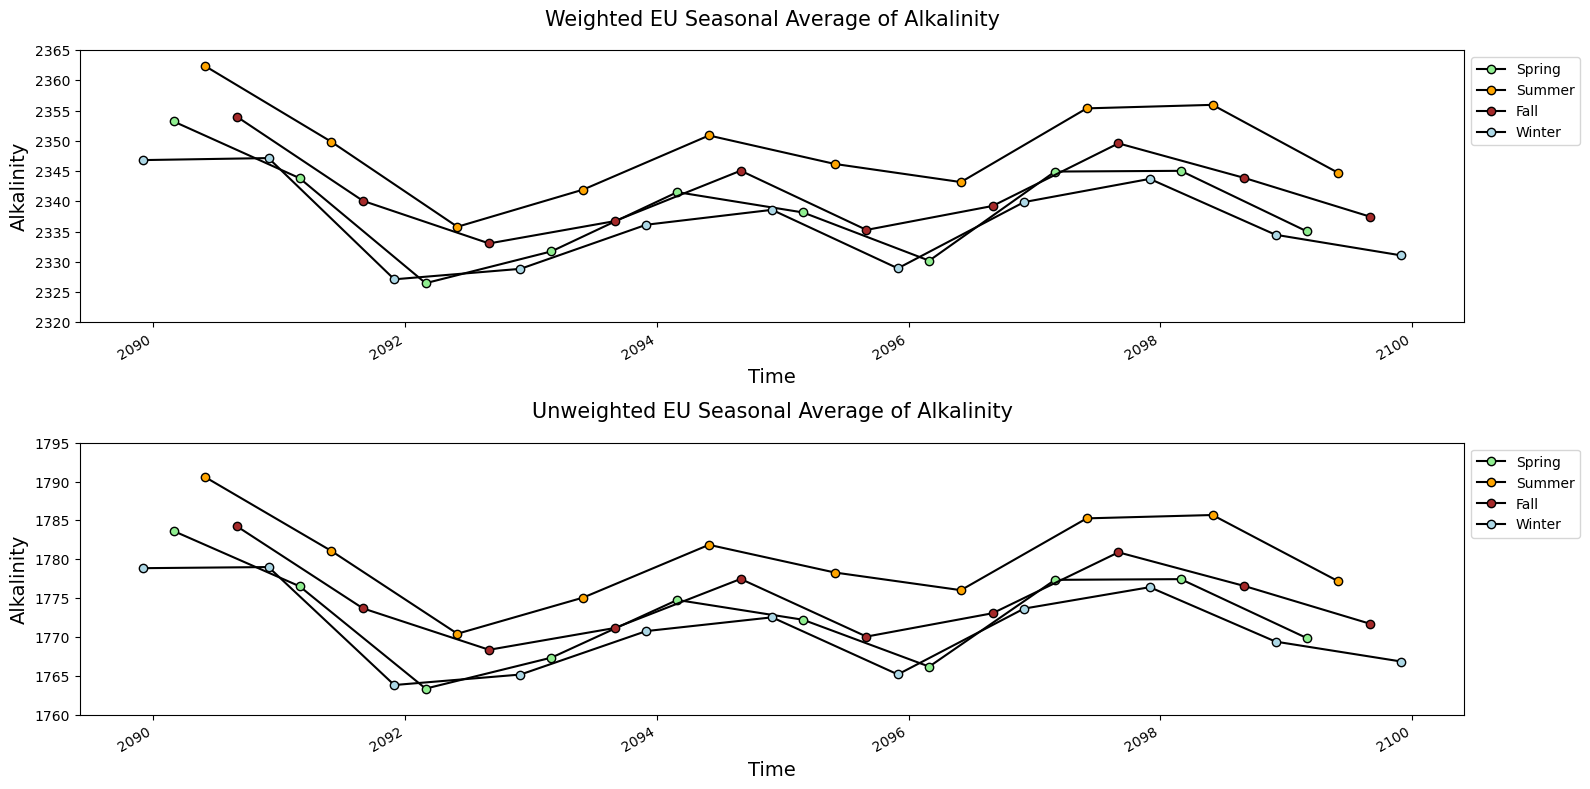

In [29]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in alk_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(2320, 2365)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity', fontsize=14)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)

for month, arr in alk_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(1760, 1795)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity', fontsize=14)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)

f.tight_layout()
plt.show()

In [18]:
uniform_alk = sliced_data.ALK.mean(dim=('deptht'))

In [22]:
df_alk = uniform_alk.sel(time_counter=slice('2090', '2100'))

In [23]:
data_alk = df_alk.to_dataset()

In [24]:
data_alk

<xarray.Dataset>
Dimensions:       (y: 114, x: 71, time_counter: 120)
Coordinates:
    nav_lat       (y, x) float32 35.13 35.13 35.13 35.13 ... 67.27 67.13 66.99
    nav_lon       (y, x) float32 -25.24 -24.74 -24.24 ... 22.95 23.49 24.03
  * time_counter  (time_counter) datetime64[ns] 2090-01-16T12:00:00 ... 2099-...
Dimensions without coordinates: y, x
Data variables:
    ALK           (time_counter, y, x) float64 nan 2.354e+03 ... nan nan

Text(0.5, 1.06, 'EU Seasonal Average of Alkalinity from 2090 to 2100')

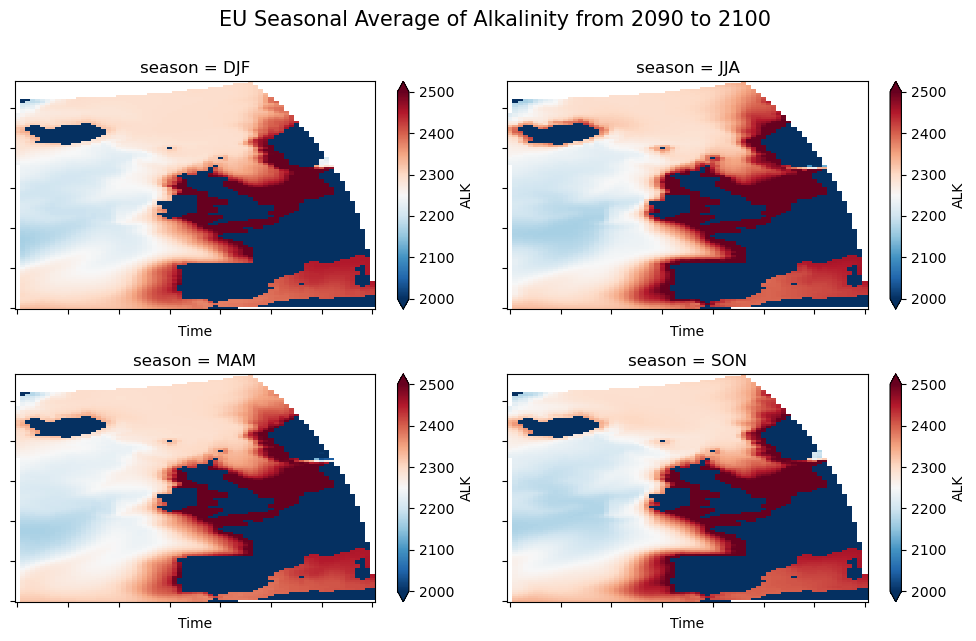

In [25]:
ds_season = data_alk.ALK.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=2000, vmax=2500, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    
for ax in axes.flat:
    ax.set(xlabel='Time', ylabel='')    

plt.tight_layout()
fig.suptitle('EU Seasonal Average of Alkalinity from 2090 to 2100', fontsize=15, y=1.06)